In [1]:
# モジュールとかもろもろ準備

import matplotlib.pyplot as plt
import numpy as np
import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, '../conf/'))
sys.path.append(os.path.join(current_dir, '../crawl/'))
sys.path.append(os.path.join(current_dir, '../data_preparing/'))


# my module
import loader
import boatrace_crawler_conf


def crawle_race_list(soup):
    """
    soupから選手名をリストとして取得
    :return racer_list: 出場選手名を枠順に並べたリスト
    """

    racer_list = []
    table = soup.find(class_="contentsFrame1_inner").find_all(class_="table1")[1]
    rows = table.find_all("tbody", {"class": "is-fs12"})

    for row in rows:
        # 選手名を取得。最後の[1:-1]は改行を削除するため
        racer_name = row.find(class_="is-fs18 is-fBold").text[1:-1]
        # race_result_listの要素としてクロールした結果のリストを追加
        racer_list.append(racer_name)

        # racerの書式をダウンロードファイルに合わせる
        racer_list_mod = []
        for racer_ in racer_list:
            racer_ = racer_.split("\u3000")
            if len(racer_[0]) == 1:
                racer_[0] = racer_[0] + "\u3000\u3000"
            elif len(racer_[0]) == 2:
                racer_[0] = racer_[0][0] + "\u3000" + racer_[0][1]

            if len(racer_[-1]) == 1:
                racer_[-1] == "\u3000\u3000" + racer_[-1]
                racer = racer_[0] + "\u3000\u3000\u3000\u3000" + racer_[-1]

            elif len(racer_[-1]) == 2:
                racer_[-1] = racer_[-1][0] + "\u3000" + racer_[-1][1]
                racer = racer_[0] + "\u3000\u3000" + racer_[-1]

            racer_list_mod.append(racer)

    print(racer_list_mod)

    return racer_list_mod


In [2]:
# 過去のレース結果をdfとして取得
the_race_result_df = loader.load_race_results()
print(the_race_result_df.columns)

Index(['date', 'venue', 'raceNumber', 'weather', 'windDir', 'windPow',
       'waveHight', 'ruler', 'win', 'winOdds', 'place_1', 'placeOdds_1',
       'place_2', 'placeOdds_2', 'exacta', 'exactaOdds', 'quinella',
       'quinellaOdds', 'wide_1', 'wideOdds_1', 'wide_2', 'wideOdds_2',
       'wide_3', 'wideOdds_3', 'trifecta', 'trifectaOdds', 'trio', 'trioOdds',
       'rank_1', 'racerId_1', 'racerName_1', 'motor_1', 'boat_1',
       'exhibitionTime_1', 'cource_1', 'startTime_1', 'raceTime_1', 'rank_2',
       'racerId_2', 'racerName_2', 'motor_2', 'boat_2', 'exhibitionTime_2',
       'cource_2', 'startTime_2', 'raceTime_2', 'rank_3', 'racerId_3',
       'racerName_3', 'motor_3', 'boat_3', 'exhibitionTime_3', 'cource_3',
       'startTime_3', 'raceTime_3', 'rank_4', 'racerId_4', 'racerName_4',
       'motor_4', 'boat_4', 'exhibitionTime_4', 'cource_4', 'startTime_4',
       'raceTime_4', 'rank_5', 'racerId_5', 'racerName_5', 'motor_5', 'boat_5',
       'exhibitionTime_5', 'cource_5', 'st

http://boatrace.jp/owpc/pc/race/racelist?rno=11&jcd=24&hd=20190724
['角\u3000谷\u3000\u3000健\u3000吾', '黒\u3000柳\u3000\u3000浩\u3000孝', '上\u3000條\u3000\u3000暢\u3000嵩', '山\u3000崎\u3000\u3000昭\u3000生', '広\u3000次\u3000\u3000\u3000\u3000修', '山\u3000口\u3000\u3000高\u3000志']
['角\u3000谷\u3000\u3000健\u3000吾', '黒\u3000柳\u3000\u3000浩\u3000孝', '上\u3000條\u3000\u3000暢\u3000嵩', '山\u3000崎\u3000\u3000昭\u3000生', '広\u3000次\u3000\u3000\u3000\u3000修', '山\u3000口\u3000\u3000高\u3000志']


/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 21495 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 33351 missing from current font.
  font.set_text(s, 0, flags=flags)


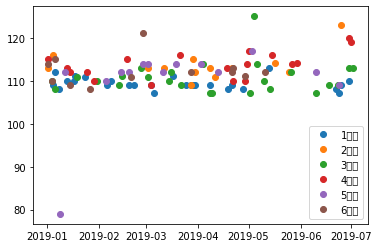

In [8]:
#### 下記inputを指定して実行 ###

# ----------input------------
the_rno = "11R"
the_jcd = "大　村"
the_hd = "2019/07/24"
# ---------------------------

the_race_url = boatrace_crawler_conf.make_url("racelist", the_rno, the_jcd,the_hd)
print(the_race_url)

the_soup = boatrace_crawler_conf.html_parser(the_race_url)

racer_list = crawle_race_list(the_soup)
print(racer_list)

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
for i, racer in enumerate(racer_list, 1):
    filtered_df = the_race_result_df[the_race_result_df["racerName_{0}".format(i)]==racer]
    ax1.plot_date(filtered_df["date"], filtered_df["raceTime_{0}".format(i)], label="{0}号艇".format(i))
    
plt.legend()
plt.show()